# Business Objective

To help farmers optimize their crop yield, we have developed a predictive model that helps identify most optimal fertilizer based on specific climatic and soil conditions.

The model uses a  Fertilizer Prediction dataset that contains detailed environmental and soil attributes essential for recommending the optimal fertilizer type.

The following data is included: temperature, humidity, soil moisture, soil type, crop type, soil nutrients (nitrogen, phosphorus, and potassium).

# Data

## Brief Data Description

Data source - data is sourced from Kaggel and it represents an original dataset. The Kaggel community is using this dataset largely for learning

Data Description - "The Fertilizer Prediction dataset contains detailed environmental and soil attributes essential for recommending the optimal fertilizer type. The features include temperature, humidity, soil moisture, soil type, crop type, and key soil nutrients—nitrogen, phosphorus, and potassium—while the target variable is the fertilizer name. This dataset enables data-driven insights for precision agriculture, helping farmers select the right fertilizer based on specific climatic and soil conditions, thereby boosting crop yield and promoting sustainable farming practices."

Data Limitations - a separate Data Sheet is provided, however two key limitations should be called out directly: (i) we need to assume that the target variable (the best filtilizer) in the observed dataset is an optimal choice, (ii) in practice, a farmer would need to have a possibility to record the data (the features) required by this model

## Data Load

In [2]:
import pandas as pd

In [3]:
data_raw = pd.read_csv('../data/Fertilizer Prediction.csv')
data_raw.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,32,51,41,Red,Ground Nuts,7,3,19,14-35-14
1,35,58,35,Black,Cotton,4,14,16,Urea
2,27,55,43,Sandy,Sugarcane,28,0,17,20-20
3,33,56,56,Loamy,Ground Nuts,37,5,24,28-28
4,32,70,60,Red,Ground Nuts,4,6,9,14-35-14


In [4]:
data_raw_backup = data_raw.copy(deep=True)

# Explanatory Data Analysis

#### >>TEMP Data cleaning
Included but not limited to:

- Handling missing values: drop them or account for them
- Handling outliers: drop them or account for them or keep them
- Remove duplicates
- Handling incorrect data types
- Handling inconsistent data (example: age shouldn't be negative)

In [5]:
import pprint as pp

In [6]:
print(f"Original column names: {list(data_raw.columns)}")
# copy raw data into a new df to avoid modifying the original data
data = data_raw.copy(deep=True)
# replace space with "_" and change to lower in column names to enable easier access
data.columns = [col.replace(" ", "_").lower() for col in data.columns]
print(f"Modified column names: {list(data.columns)}")
data.head(1)

Original column names: ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']
Modified column names: ['temparature', 'humidity', 'moisture', 'soil_type', 'crop_type', 'nitrogen', 'potassium', 'phosphorous', 'fertilizer_name']


,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,32,51,41,Red,Ground Nuts,7,3,19,14-35-14


### Basic info & high level data review

In [7]:
print("Number of rows and columns:", data.shape)
print("\nData basic info:\n")
data.info()

Number of rows and columns: (100000, 9)

Data basic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   temparature      100000 non-null  int64 
 1   humidity         100000 non-null  int64 
 2   moisture         100000 non-null  int64 
 3   soil_type        100000 non-null  object
 4   crop_type        100000 non-null  object
 5   nitrogen         100000 non-null  int64 
 6   potassium        100000 non-null  int64 
 7   phosphorous      100000 non-null  int64 
 8   fertilizer_name  100000 non-null  object
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


Based on the above we can see we have 6 numerical and 3 non-numerical features, one of which is the target variable.


### NULL values

In [9]:
# NULL values
data.isna().sum()

temparature        0
humidity           0
moisture           0
soil_type          0
crop_type          0
nitrogen           0
potassium          0
phosphorous        0
fertilizer_name    0
dtype: int64

We can see there are no NULL values

In [10]:
print("Data basic statistics of numerical features:")
data.describe().T.round()

Data basic statistics of numerical features:


,count,mean,std,min,25%,50%,75%,max
temparature,100000.0,32.0,4.0,25.0,28.0,32.0,35.0,38.0
humidity,100000.0,61.0,7.0,50.0,55.0,61.0,67.0,72.0
moisture,100000.0,45.0,12.0,25.0,35.0,45.0,55.0,65.0
nitrogen,100000.0,23.0,11.0,4.0,13.0,23.0,33.0,42.0
potassium,100000.0,9.0,6.0,0.0,4.0,9.0,14.0,19.0
phosphorous,100000.0,21.0,12.0,0.0,10.0,21.0,32.0,42.0


Based on the above we cannot say anything about outliers, data-ranges seem fine. We will add visualization / distributions to further investigate the presence of outliers

In [11]:
print("Data basic statistics of non-numerical features:")
data.describe(include='object').T

Data basic statistics of non-numerical features:


,count,unique,top,freq
soil_type,100000,5,Black,20100
crop_type,100000,11,Sugarcane,9267
fertilizer_name,100000,7,14-35-14,14492


Split numercial and categorical columns. Extract target variable

In [ ]:
# split numerical and categorical columns
numerical_columns = data.select_dtypes(include='number').columns
categorical_columns = data.select_dtypes(include='object').columns
# define target variable
target_variable = 'fertilizer_name'

### Distribution - categorical variables

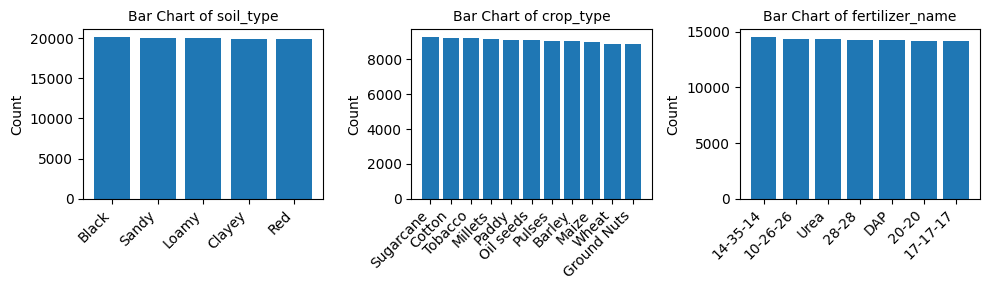

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for i, col in enumerate(categorical_columns):
    value_counts = data[col].value_counts()
    # colour with blue shades
    # norm = mcolors.Normalize(vmin=min(value_counts.values), vmax=max(value_counts.values))
    # cmap = plt.get_cmap('Blues')
    # # Map values to colors, but clip to [0.2, 1.0] range
    # bar_colors = [cmap(0.2 + 0.8 * norm(v)) for v in value_counts.values]
    # bars = ax[i].bar(value_counts.index, value_counts.values, color=bar_colors)
    ax[i].bar(value_counts.index, value_counts.values)#, color='grey')
    ax[i].set_title(f'Bar Chart of {col}', fontsize=10)
    ax[i].set_ylabel('Count', fontsize=10)
    
    # Fix: Set tick positions first, then labels
    ax[i].set_xticks(range(len(value_counts.index)))
    ax[i].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=10)
    ax[i].tick_params(axis='y', labelsize=10)\

plt.tight_layout()
plt.show()

-> From the above we can see the categories within each feature are quite evenly distributted

### Distribution - numerical features

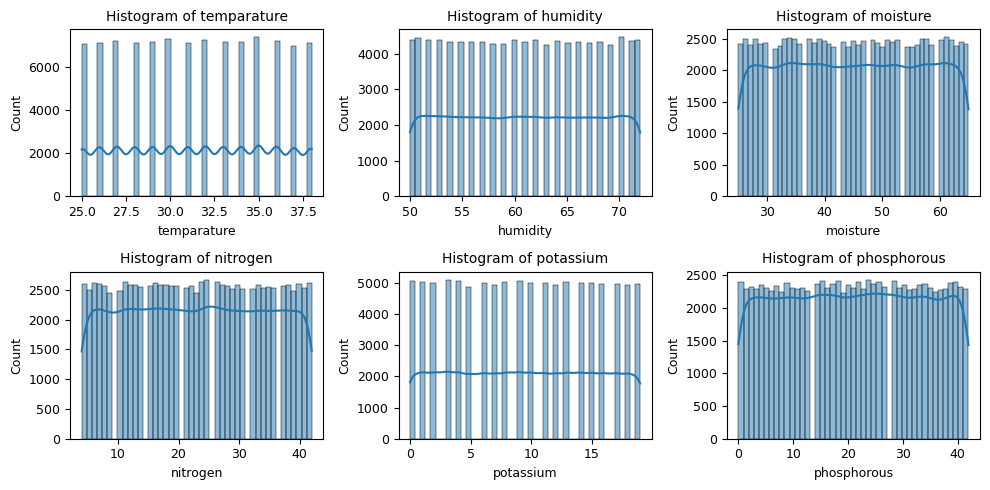

In [61]:
# histogram to identify distributions
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
for i, col in enumerate(data[numerical_columns]):
    sns.histplot(data[col], kde=True, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'Histogram of {col}', fontsize=10)
    ax[i//3, i%3].tick_params(axis='y', labelsize=9)
    ax[i//3, i%3].tick_params(axis='x', labelsize=9)
    ax[i//3, i%3].set_ylabel('Count', fontsize=9)
    ax[i//3, i%3].set_xlabel(col, fontsize=9)
plt.tight_layout()
plt.show()

-> The data is not normally distributed. There is no skewness or long tails in the data. The values of each feature look quite evenly / uniformely distributed apart from 

### Outliers identification - numerical features

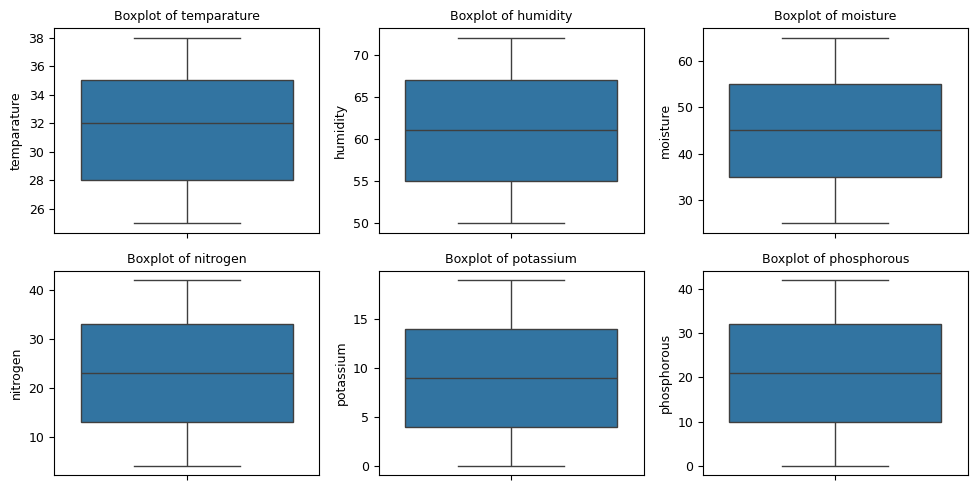

In [55]:
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
for i, col in enumerate(data[numerical_columns]):
    sns.boxplot(y=data[col], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'Boxplot of {col}', fontsize=9)
    ax[i//3, i%3].set_ylabel(col, fontsize=9)
    ax[i//3, i%3].tick_params(axis='y', labelsize=9)
    ax[i//3, i%3].tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show()

-> Based on the above we can say that the medians of almost all features are largely positions within a centre of the box, indicating a symmetrical distributions. However, for temperature, we can see the median is a bit higher than the centre, suggesting thereby some shewness in the distribution.Finally, the chart shows no outliers (per 1.5 x IQR definition)

None of the above methods - boxplot, histogram, lower/upper quartile analysis - identify outliers.

We can conclude that the dataset is clean, i.e. no missing values and no outliers.

In [12]:
# Value counts for non-numerical columns
print("Value counts for categorical features:\n")

categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    print("-" * len(col))
    print(data[col].value_counts())
    print(f"Unique values: {data[col].nunique()}\n")

Value counts for categorical features:

---------
soil_type
Black     20100
Sandy     20064
Loamy     19999
Clayey    19920
Red       19917
Name: count, dtype: int64
Unique values: 5

---------
crop_type
Sugarcane      9267
Cotton         9237
Tobacco        9224
Millets        9154
Paddy          9103
Oil seeds      9096
Pulses         9072
Barley         9041
Maize          9013
Wheat          8912
Ground Nuts    8881
Name: count, dtype: int64
Unique values: 11

---------------
fertilizer_name
14-35-14    14492
10-26-26    14378
Urea        14325
28-28       14232
DAP         14220
20-20       14181
17-17-17    14172
Name: count, dtype: int64
Unique values: 7



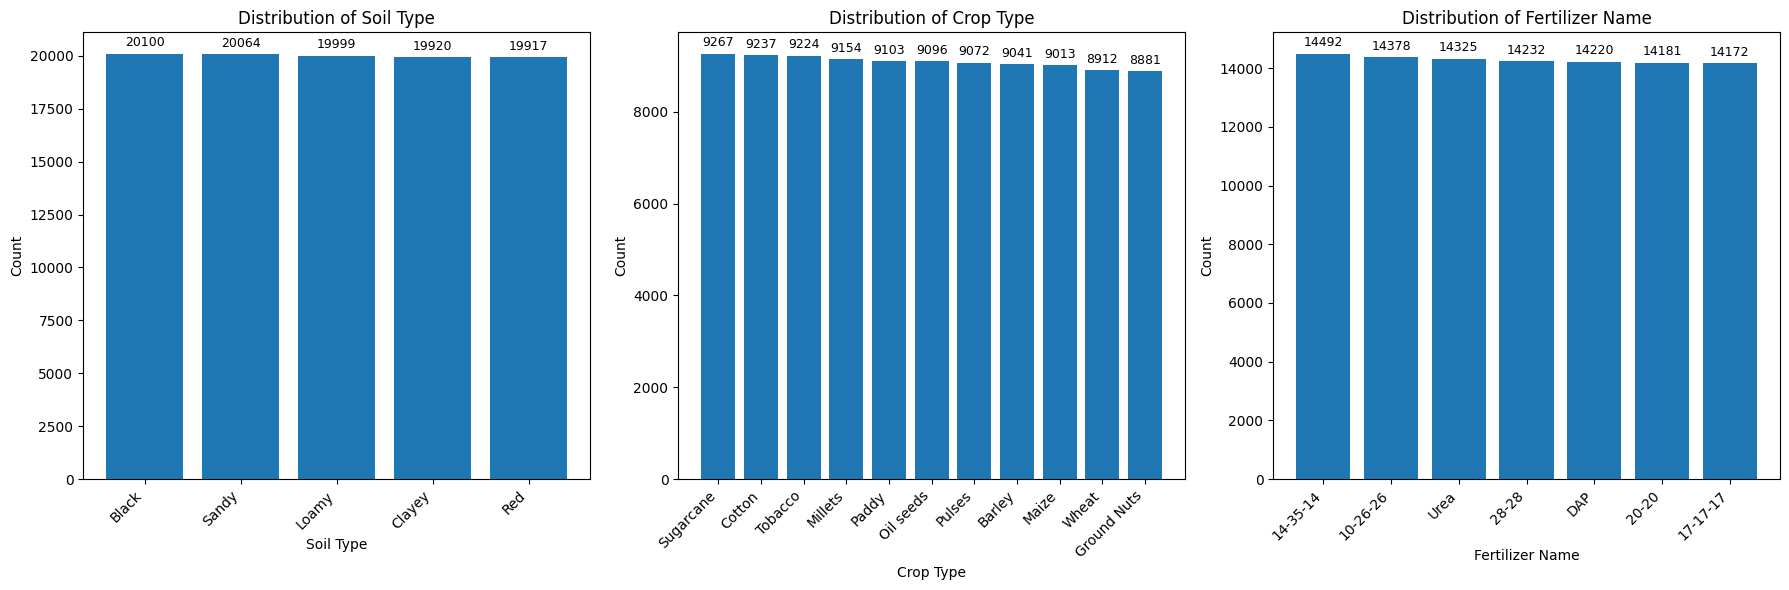

In [13]:
# Bar charts for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
categorical_columns = data.select_dtypes(include='object').columns

for i, col in enumerate(categorical_columns):
    value_counts = data[col].value_counts()
    axes[i].bar(range(len(value_counts)), value_counts.values)
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Count')
    
    # Set x-axis labels with rotation for readability
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Add value labels on top of bars
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v + max(value_counts.values) * 0.01, str(v), 
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Based on the above, we can state that the categorical variables - soil type, crop type and fertilizer name - are almost uniformly distributed. In other words, the count of each category within a feature is almost the same. This seems like a perfect dataset, which could indicate that a data sampling exercise was performed before this dataset was published.

### Correlations

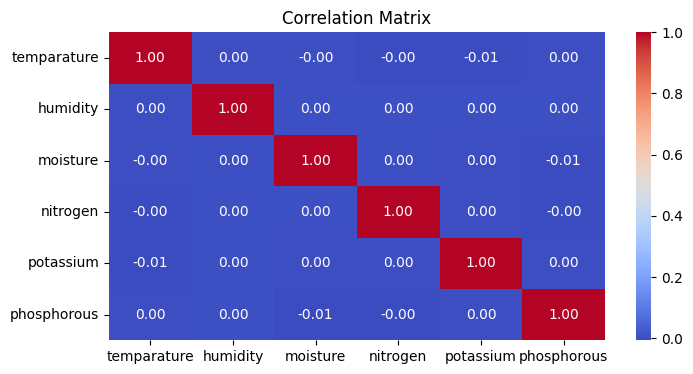

In [14]:
# correlation matrix for numerical features only
plt.figure(figsize=(8, 4))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

### Correlation between Numerical and Categorical Features

In [15]:
# Method 1: ANOVA F-test (measures if categorical variable significantly affects numerical variable)
from scipy.stats import f_oneway
import numpy as np

print("ANOVA F-test results (numerical vs categorical features):")
print("="*60)

for cat_col in categorical_columns:
    print(f"\n{cat_col.upper()}:")
    print("-" * (len(cat_col) + 1))
    
    for num_col in numerical_columns:
        # Group numerical data by categorical variable
        groups = [data[data[cat_col] == category][num_col].values for category in data[cat_col].unique()]
        
        # Perform ANOVA F-test
        f_stat, p_value = f_oneway(*groups)
        
        # Interpret result
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        
        print(f"{num_col}: F-statistic = {f_stat:.3f}, p-value = {p_value:.6f} {significance}")
    
print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")

ANOVA F-test results (numerical vs categorical features):

SOIL_TYPE:
----------
temparature: F-statistic = 2.877, p-value = 0.021414 *
humidity: F-statistic = 1.543, p-value = 0.186631 
moisture: F-statistic = 0.502, p-value = 0.734077 
nitrogen: F-statistic = 0.746, p-value = 0.560460 
potassium: F-statistic = 0.642, p-value = 0.632527 
phosphorous: F-statistic = 0.261, p-value = 0.903097 

CROP_TYPE:
----------
temparature: F-statistic = 0.611, p-value = 0.806217 
humidity: F-statistic = 0.740, p-value = 0.687561 
moisture: F-statistic = 1.018, p-value = 0.424920 
nitrogen: F-statistic = 0.876, p-value = 0.554878 
potassium: F-statistic = 1.044, p-value = 0.403109 
phosphorous: F-statistic = 1.265, p-value = 0.244189 

FERTILIZER_NAME:
----------------
temparature: F-statistic = 0.278, p-value = 0.947443 
humidity: F-statistic = 1.030, p-value = 0.403574 
moisture: F-statistic = 1.016, p-value = 0.412360 
nitrogen: F-statistic = 0.747, p-value = 0.611508 
potassium: F-statistic = 1.

In [16]:
# Method 2: Eta-squared (effect size) - measures strength of association
print("\n" + "="*60)
print("ETA-SQUARED (Effect Size) - Strength of Association:")
print("="*60)

def eta_squared(data, categorical_col, numerical_col):
    """Calculate eta-squared (effect size) for categorical vs numerical relationship"""
    groups = [data[data[categorical_col] == category][numerical_col].values 
             for category in data[categorical_col].unique()]
    
    # Overall mean
    overall_mean = data[numerical_col].mean()
    
    # Between-group sum of squares
    ss_between = sum(len(group) * (np.mean(group) - overall_mean)**2 for group in groups)
    
    # Total sum of squares
    ss_total = sum((data[numerical_col] - overall_mean)**2)
    
    # Eta-squared
    eta_sq = ss_between / ss_total if ss_total != 0 else 0
    return eta_sq

for cat_col in categorical_columns:
    print(f"\n{cat_col.upper()}:")
    print("-" * (len(cat_col) + 1))
    
    for num_col in numerical_columns:
        eta_sq = eta_squared(data, cat_col, num_col)
        
        # Interpret effect size
        if eta_sq >= 0.14:
            effect = "Large"
        elif eta_sq >= 0.06:
            effect = "Medium"
        elif eta_sq >= 0.01:
            effect = "Small"
        else:
            effect = "Negligible"
            
        print(f"{num_col}: η² = {eta_sq:.4f} ({effect} effect)")

print("\nEffect size interpretation:")
print("η² ≥ 0.14: Large effect")
print("η² ≥ 0.06: Medium effect") 
print("η² ≥ 0.01: Small effect")
print("η² < 0.01: Negligible effect")


ETA-SQUARED (Effect Size) - Strength of Association:

SOIL_TYPE:
----------
temparature: η² = 0.0001 (Negligible effect)
humidity: η² = 0.0001 (Negligible effect)
moisture: η² = 0.0000 (Negligible effect)
nitrogen: η² = 0.0000 (Negligible effect)
potassium: η² = 0.0000 (Negligible effect)
phosphorous: η² = 0.0000 (Negligible effect)

CROP_TYPE:
----------
temparature: η² = 0.0001 (Negligible effect)
humidity: η² = 0.0001 (Negligible effect)
moisture: η² = 0.0001 (Negligible effect)
nitrogen: η² = 0.0001 (Negligible effect)
potassium: η² = 0.0001 (Negligible effect)
phosphorous: η² = 0.0001 (Negligible effect)

FERTILIZER_NAME:
----------------
temparature: η² = 0.0000 (Negligible effect)
humidity: η² = 0.0001 (Negligible effect)
moisture: η² = 0.0001 (Negligible effect)
nitrogen: η² = 0.0000 (Negligible effect)
potassium: η² = 0.0001 (Negligible effect)
phosphorous: η² = 0.0001 (Negligible effect)

Effect size interpretation:
η² ≥ 0.14: Large effect
η² ≥ 0.06: Medium effect
η² ≥ 0.01:


VISUAL ANALYSIS:

Analyzing soil_type...


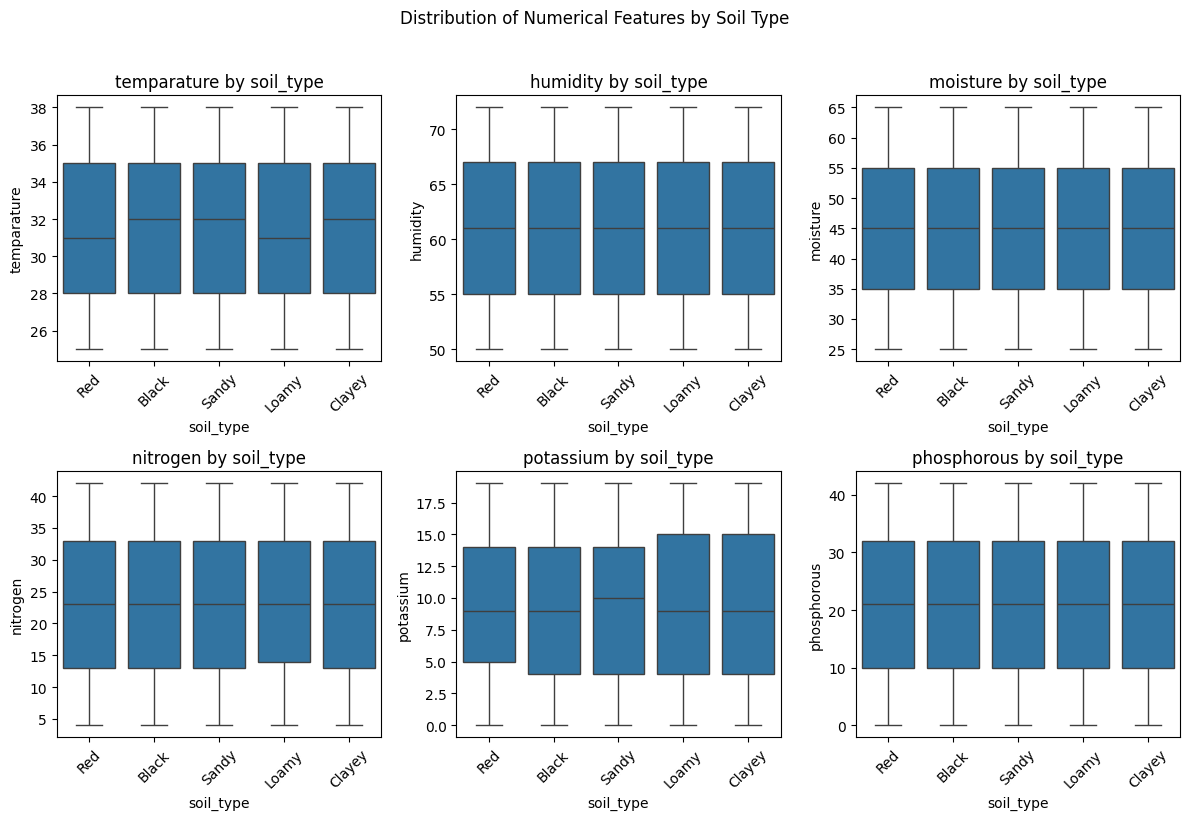


Analyzing crop_type...


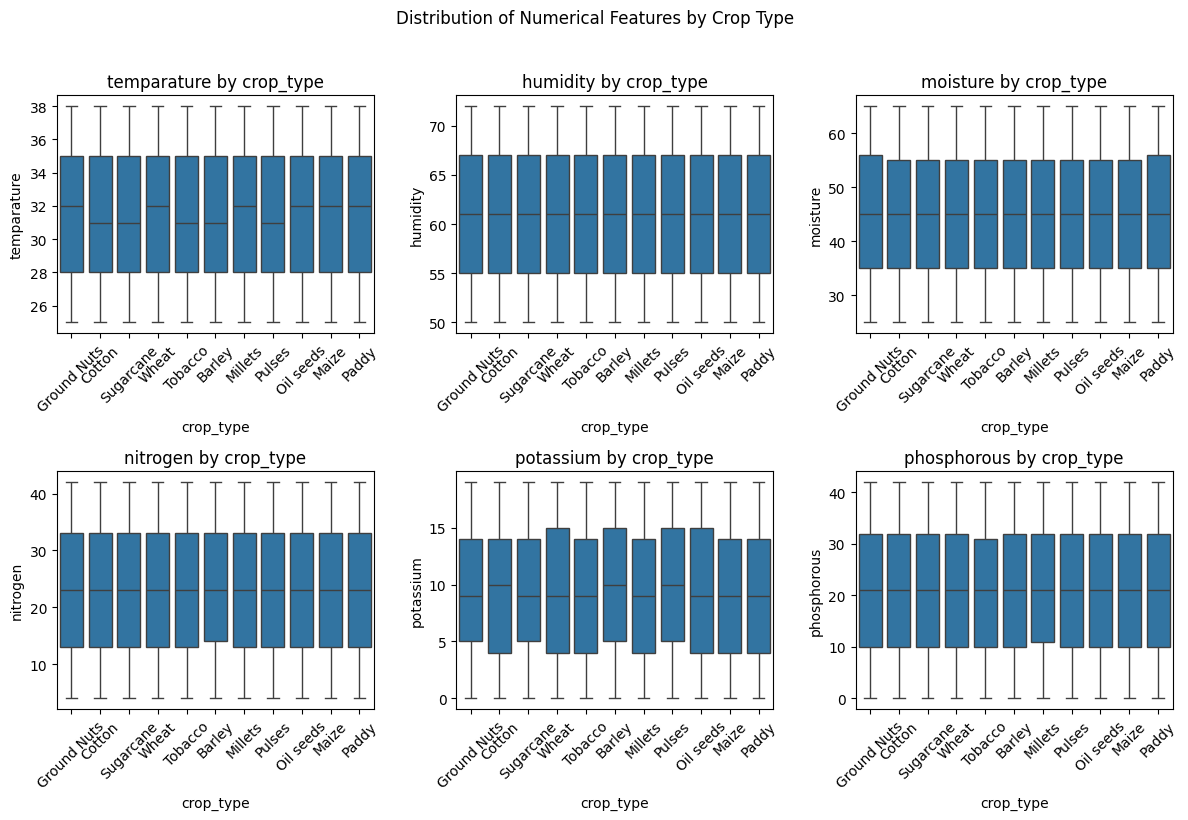


Analyzing fertilizer_name...


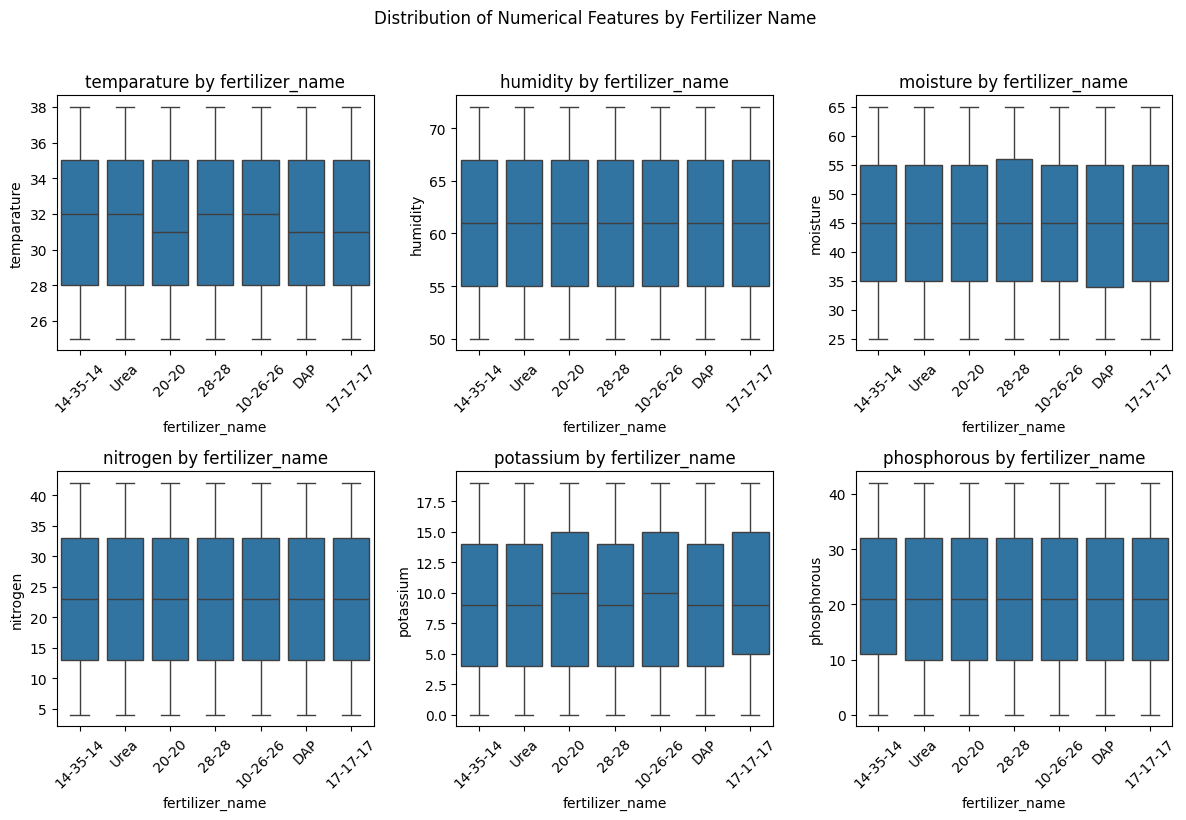

In [17]:
# Method 3: Visual Analysis - Box plots to see distribution of numerical features by categories
print("\n" + "="*60)
print("VISUAL ANALYSIS:")
print("="*60)

# Create box plots for each categorical vs numerical combination
for cat_col in categorical_columns:
    print(f"\nAnalyzing {cat_col}...")
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle(f'Distribution of Numerical Features by {cat_col.replace("_", " ").title()}', 
                 fontsize=12, y=1.02)
    
    for i, num_col in enumerate(numerical_columns):
        row = i // 3
        col = i % 3
        
        sns.boxplot(data=data, x=cat_col, y=num_col, ax=axes[row, col])
        axes[row, col].set_title(f'{num_col} by {cat_col}')
        axes[row, col].tick_params(axis='x', rotation=45)
        
    plt.tight_layout()
    plt.show()

# Train / test split

Before we move to feature engineering we will perform train/test split of the data. This is needed to ensure no data leakage occurs. It is also needed to ensure the evaluatin of the model is unbiased, i.e. performed on data that model has not seen so far. This imitates a situation in a future when new data arise and the model needs to make a correct prediction

To perform the train/test split we will use the common train_test_split module from the  sklearn library

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data.head(2)

,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,32,51,41,Red,Ground Nuts,7,3,19,14-35-14
1,35,58,35,Black,Cotton,4,14,16,Urea


In [20]:
# get X and y arrays
X = data.drop(columns=['fertilizer_name'])
y = data['fertilizer_name']

In [21]:
# Split the data into training and testing sets
test_split_size = 0.2  # 20% for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_size, random_state=42) # setting random_state for reproducibility

# Data Preprocessing / Feature engineering

### Missing values

In [22]:
data.isnull().sum()

temparature        0
humidity           0
moisture           0
soil_type          0
crop_type          0
nitrogen           0
potassium          0
phosphorous        0
fertilizer_name    0
dtype: int64

As seen in the EDA section, as well as above, there are no missing values.

### Scaling & encoding

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
categorical_col_exl_target = [col for col in categorical_columns if col != 'fertilizer_name']
categorical_col_exl_target

['soil_type', 'crop_type']

In [25]:
preprocessor_X= ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_col_exl_target)
    ])

preprocessor_X

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [26]:
# fit & transform X
X_train_processed = preprocessor_X.fit_transform(X_train)
# transform X test
X_test_processed = preprocessor_X.transform(X_test)

In [27]:
# convert processed features into a df

# get new col names for categorical features after one-hot encoding
onehotenc = preprocessor_X.named_transformers_['cat']
onehotenc_feature_names = onehotenc.get_feature_names_out(categorical_col_exl_target)
# combine numerical and new categorical feature names
new_column_names = list(numerical_columns) + list(onehotenc_feature_names)

# transform to df
X_train_processed_df = pd.DataFrame(X_train_processed, columns=new_column_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=new_column_names)
X_train_processed_df.head(2)

,temparature,humidity,moisture,nitrogen,potassium,phosphorous,soil_type_Clayey,soil_type_Loamy,soil_type_Red,soil_type_Sandy,crop_type_Cotton,crop_type_Ground Nuts,crop_type_Maize,crop_type_Millets,crop_type_Oil seeds,crop_type_Paddy,crop_type_Pulses,crop_type_Sugarcane,crop_type_Tobacco,crop_type_Wheat
0,0.618581,1.355766,1.436888,-0.888641,-0.772182,-0.965331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.618241,0.303373,0.085052,-0.177642,-0.772182,-0.884679,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


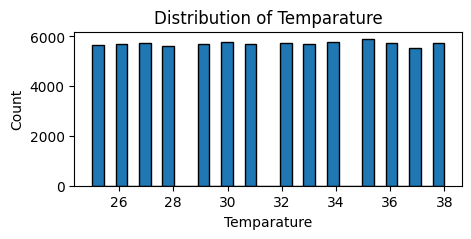

In [28]:
#  check previous distribution of temperature data
plt.figure(figsize=(5, 2))
plt.hist(X_train.temparature, bins=30, edgecolor='k')
plt.xlabel('Temparature')
plt.ylabel('Count')
plt.title('Distribution of Temparature')
plt.show()

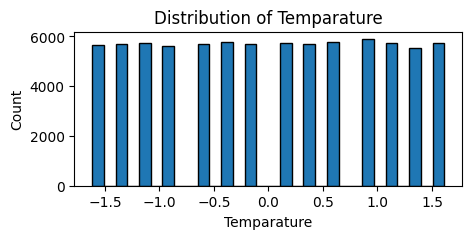

In [29]:
# check scaled distribution of temperature data
plt.figure(figsize=(5, 2))
plt.hist(X_train_processed_df.temparature, bins=30, edgecolor='k')
plt.xlabel('Temparature')
plt.ylabel('Count')
plt.title('Distribution of Temparature')
plt.show()

### Label Y

In [30]:
# encode label y
label_encoder_y = LabelEncoder()
y_train_processed = label_encoder_y.fit_transform(y_train)
y_test_processed = label_encoder_y.transform(y_test)

In [31]:
pd.DataFrame(y_test).fertilizer_name.value_counts()

fertilizer_name
14-35-14    2918
28-28       2918
Urea        2871
20-20       2856
10-26-26    2849
17-17-17    2805
DAP         2783
Name: count, dtype: int64

In [32]:
# Get unique values and their counts for y_test_encoded
pd.Series(y_test_processed).value_counts()

1    2918
4    2918
6    2871
3    2856
0    2849
2    2805
5    2783
Name: count, dtype: int64

# Over-/under-sampling

In the EDA analysis we could see the datasample is balanced, i.e. each target feature's value (each crop type) occurs similar number of time. Therefore, no under- or over-sampling techniques needs to be applied. We are moving to cross-validation.

# Model training & validation

## Models Selection

Given our target variables are categorical, we are dealing with classification model. For this we could use a number of models. The ones that we will test in this project are as follows:
* Logistic Regression
* Decision Tree Classifier
* SVC
* KNN Classifier
* Random Forest Classifier
* Ada Boost Classifier
* Gradient Boost Classifier
* XGBoost Classifier

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    # "Support Vector Machine (Linear)": SVC(kernel='linear'),
    # "Support Vector Machine (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

## Cross-Validation & Model Evaluation

We will use cross-validation to evaluate each model. To find the best model we will compute the following metrics:
* Accuracy Score
* Precision Score
* Recall Score
* F1 Score


roc_auc_score
roc_curve
auc
confusion_matrix
classification_report

In [41]:
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold, KFold

# StratifiedKFold cross-validation, with 5 folds, to maintain class distribution in each fold
# cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cross_val = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = KFold(n_splits=3, shuffle=True, random_state=42)

# for model_name, model in models.items():
#     scores = cross_val_score(model, X, y, cv=cross_val, scoring='accuracy')
#     print(f"{model_name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


metrics = {
    "accuracy": "accuracy",
    "macro_f1": "f1_macro",
    "macro_recall": "recall_macro",
    # "neg_log_loss": "neg_log_loss",
    # "weighted_f1": "f1_weighted",
    # "macro_precision": "precision_macro",

}


In [49]:
i = 0
for model_name, model in models.items():
    if i >= 0:
        print("=" * 50)
        print(f"\nTraining and evaluating model: {model_name}\n")
        res = cross_validate(
            model,
            X_train_processed,
            y_train_processed,
            cv=cross_val,
            scoring=metrics,#list(metrics.keys()),
            )

        for metric_name, metric_values in res.items():
            print(f"{metric_name.capitalize()}: {metric_values.mean():.4f} ± {metric_values.std():.4f}")
    i += 1



Training and evaluating model: Logistic Regression

Fit_time: 0.0763 ± 0.0070
Score_time: 0.0058 ± 0.0001
Test_accuracy: 0.1430 ± 0.0013
Test_macro_f1: 0.1377 ± 0.0035
Test_macro_recall: 0.1430 ± 0.0013

Training and evaluating model: Decision Tree

Fit_time: 0.2184 ± 0.0124
Score_time: 0.0106 ± 0.0017
Test_accuracy: 0.1436 ± 0.0006
Test_macro_f1: 0.1436 ± 0.0006
Test_macro_recall: 0.1436 ± 0.0006

Training and evaluating model: Random Forest

Fit_time: 3.9598 ± 0.0244
Score_time: 0.4450 ± 0.0096
Test_accuracy: 0.1424 ± 0.0009
Test_macro_f1: 0.1421 ± 0.0011
Test_macro_recall: 0.1423 ± 0.0009

Training and evaluating model: AdaBoost

Fit_time: 0.7254 ± 0.0148
Score_time: 0.0615 ± 0.0019
Test_accuracy: 0.1425 ± 0.0004
Test_macro_f1: 0.1317 ± 0.0054
Test_macro_recall: 0.1424 ± 0.0005

Training and evaluating model: Gradient Boosting

Fit_time: 20.8338 ± 0.3974
Score_time: 0.1556 ± 0.0009
Test_accuracy: 0.1439 ± 0.0013
Test_macro_f1: 0.1429 ± 0.0015
Test_macro_recall: 0.1439 ± 0.0013

Tra

In [ ]:
    model.fit(X_train_processed, y_train_processed)
    y_pred = model.predict(X_test_processed)
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_processed, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test_processed, y_pred, target_names=label_encoder_y.classes_))

    # Calculate and print each metric
    for metric_name, metric_func in metrics.items():
        if metric_name in ['recall', 'precision', 'f1']:
            score = metric_func(y_test_encoded, y_pred, average='weighted')
        else:
            score = metric_func(y_test_encoded, y_pred)
        print(f"{metric_name.capitalize()}: {score:.4f}")
        
    print("-" * 50)

# Model Validation - Tuning (Hyperparameters)

# Model Testing - Best Model Selection

# Model Interpretation

# Results